# 对比一下不同的初始化情况

In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}

## １．tanh + np.random.randn(fan_in, fan_out) * 0.01

input layer had mean -0.001096 and std 0.999309
hidden layer 1 had mean 0.000178 and std 0.213557
hidden layer 2 had mean 0.000094 and std 0.047481
hidden layer 3 had mean -0.000017 and std 0.010634
hidden layer 4 had mean 0.000001 and std 0.002374
hidden layer 5 had mean 0.000001 and std 0.000530
hidden layer 6 had mean -0.000000 and std 0.000118
hidden layer 7 had mean 0.000000 and std 0.000026
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean -0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


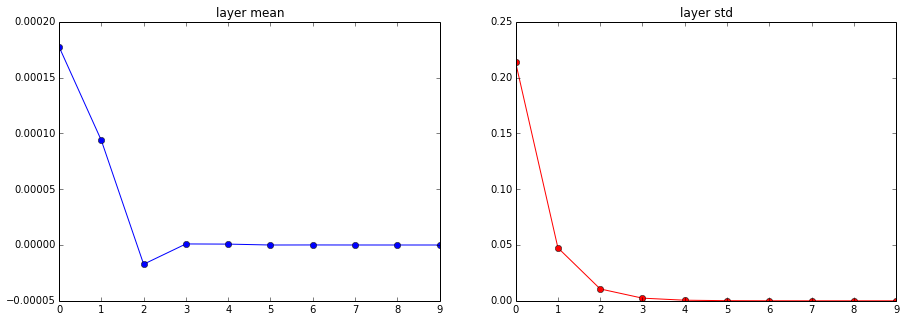

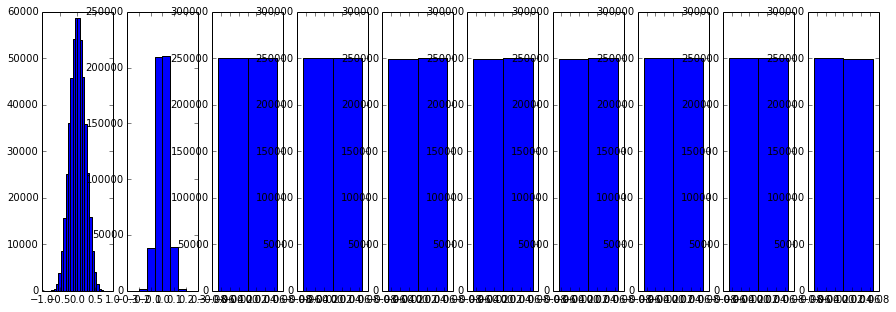

In [24]:
#***************active funtion "tanh"
nonlinearities = ['tanh']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------little random number
    W = np.random.randn(fan_in, fan_out) * 0.01

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')

## 2. tanh + 0

input layer had mean -0.001096 and std 0.999309
hidden layer 1 had mean 0.000000 and std 0.000000
hidden layer 2 had mean 0.000000 and std 0.000000
hidden layer 3 had mean 0.000000 and std 0.000000
hidden layer 4 had mean 0.000000 and std 0.000000
hidden layer 5 had mean 0.000000 and std 0.000000
hidden layer 6 had mean 0.000000 and std 0.000000
hidden layer 7 had mean 0.000000 and std 0.000000
hidden layer 8 had mean 0.000000 and std 0.000000
hidden layer 9 had mean 0.000000 and std 0.000000
hidden layer 10 had mean 0.000000 and std 0.000000


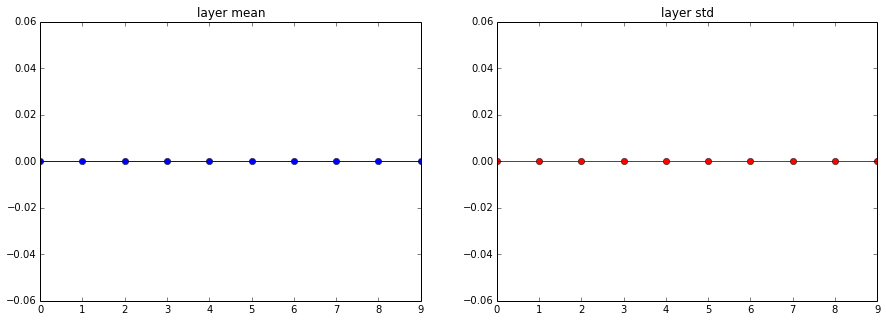

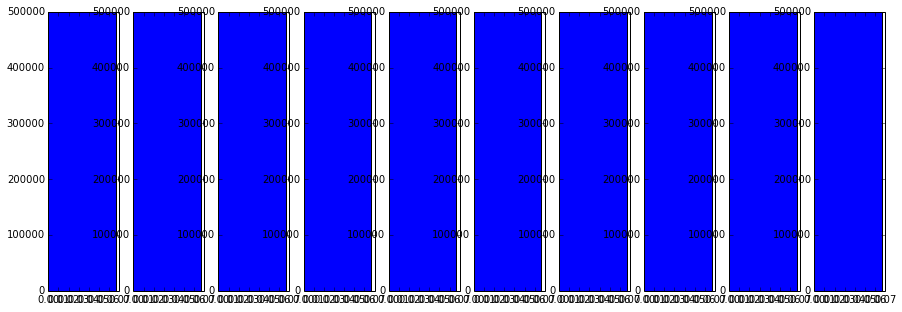

In [25]:
#***************active funtion "tanh"
nonlinearities = ['tanh']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------zero
    W = 0
    #-------big number 
    #W = np.random.randn(fan_in, fan_out) * 1
    #-------xavier and tanh (xavier and relu)
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')
    

## 3. tanh + np.random.randn(fan_in, fan_out) * 1 

input layer had mean -0.001096 and std 0.999309
hidden layer 1 had mean -0.000205 and std 0.981953
hidden layer 2 had mean 0.001130 and std 0.981847
hidden layer 3 had mean 0.004220 and std 0.981415
hidden layer 4 had mean 0.000026 and std 0.981669
hidden layer 5 had mean -0.001227 and std 0.981727
hidden layer 6 had mean 0.000693 and std 0.981539
hidden layer 7 had mean 0.000371 and std 0.981736
hidden layer 8 had mean -0.000390 and std 0.981902
hidden layer 9 had mean -0.000358 and std 0.981615
hidden layer 10 had mean -0.000531 and std 0.981640


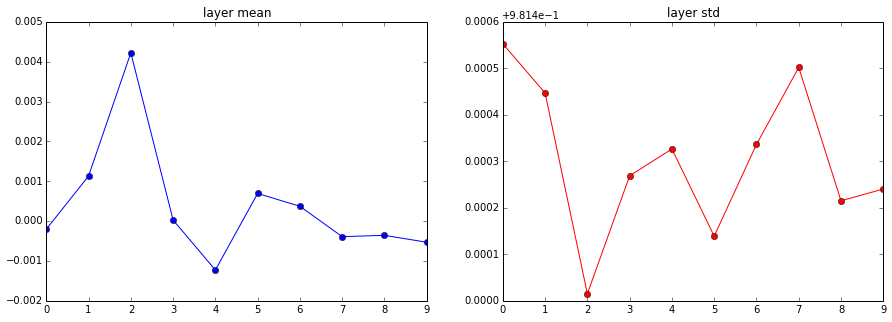

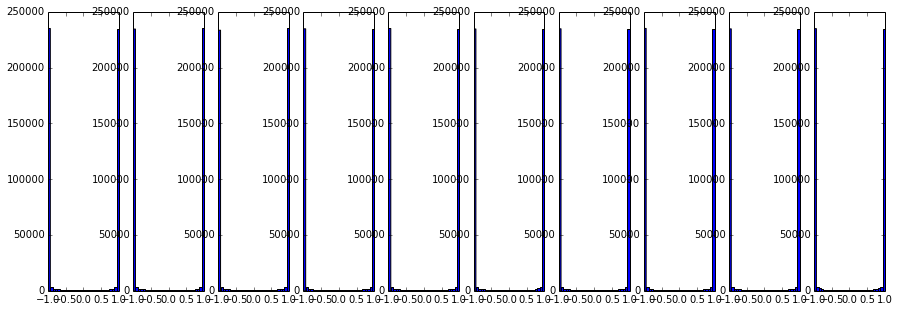

In [26]:
#***************active funtion "tanh"
nonlinearities = ['tanh']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------big number 
    W = np.random.randn(fan_in, fan_out) * 1
    #-------xavier and tanh (xavier and relu)
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')

## 4. tahn + xavier

input layer had mean -0.001096 and std 0.999309
hidden layer 1 had mean -0.000288 and std 0.627031
hidden layer 2 had mean -0.000857 and std 0.486353
hidden layer 3 had mean -0.000246 and std 0.408327
hidden layer 4 had mean 0.000904 and std 0.357480
hidden layer 5 had mean -0.000217 and std 0.321706
hidden layer 6 had mean 0.000181 and std 0.294503
hidden layer 7 had mean -0.000203 and std 0.272268
hidden layer 8 had mean -0.000523 and std 0.256382
hidden layer 9 had mean 0.000490 and std 0.239780
hidden layer 10 had mean 0.000843 and std 0.227685


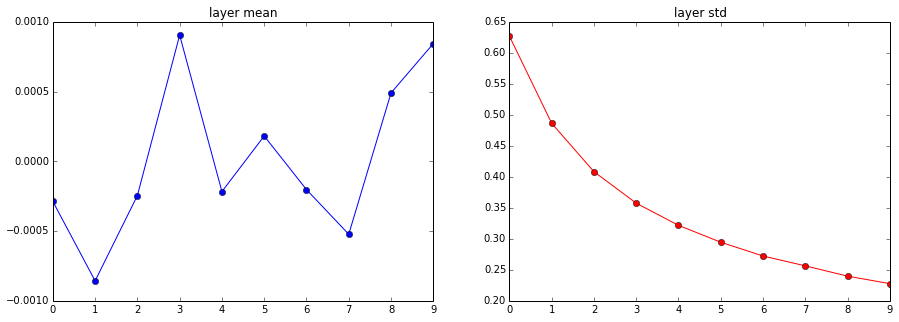

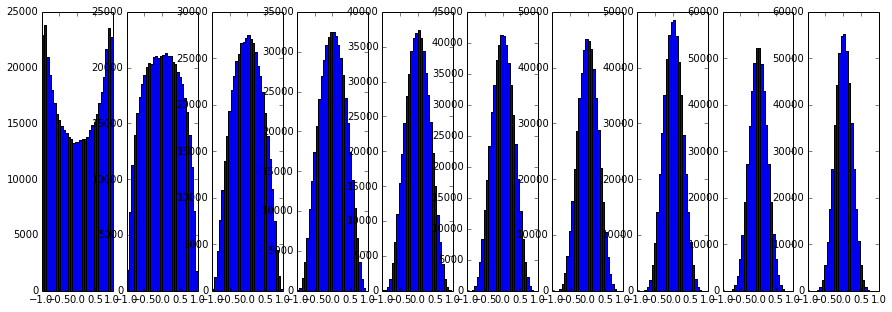

In [27]:
#***************active funtion "tanh"
nonlinearities = ['tanh']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------xavier and tanh (xavier and relu)
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')

## 5. tahn + xavier

input layer had mean -0.000536 and std 1.000232
hidden layer 1 had mean 0.399072 and std 0.583473
hidden layer 2 had mean 0.278149 and std 0.407629
hidden layer 3 had mean 0.191901 and std 0.286405
hidden layer 4 had mean 0.131599 and std 0.199755
hidden layer 5 had mean 0.088328 and std 0.131371
hidden layer 6 had mean 0.057838 and std 0.091841
hidden layer 7 had mean 0.042355 and std 0.061433
hidden layer 8 had mean 0.027513 and std 0.042924
hidden layer 9 had mean 0.020205 and std 0.028877
hidden layer 10 had mean 0.014601 and std 0.020929


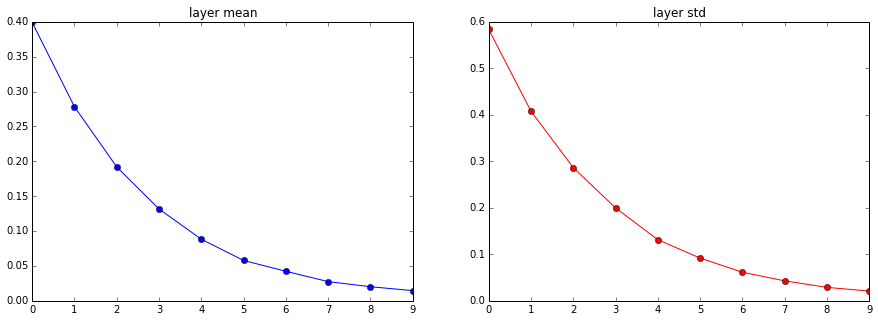

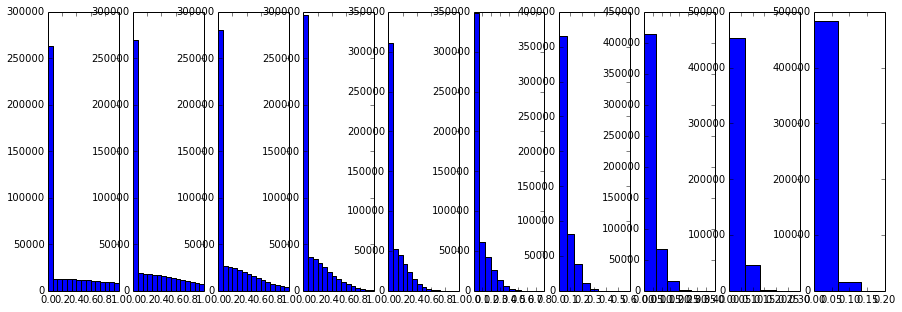

In [32]:
#***************active funtion "tanh"
nonlinearities = ['relu']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------xavier and tanh (xavier and relu)
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    #W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')

input layer had mean -0.000536 and std 1.000232
hidden layer 1 had mean 0.000385 and std 0.720463
hidden layer 2 had mean 0.000054 and std 0.633066
hidden layer 3 had mean -0.000757 and std 0.595025
hidden layer 4 had mean 0.000776 and std 0.577528
hidden layer 5 had mean 0.000701 and std 0.567364
hidden layer 6 had mean 0.000379 and std 0.560862
hidden layer 7 had mean -0.000686 and std 0.557771
hidden layer 8 had mean -0.001528 and std 0.556778
hidden layer 9 had mean -0.000413 and std 0.556691
hidden layer 10 had mean -0.000242 and std 0.555674


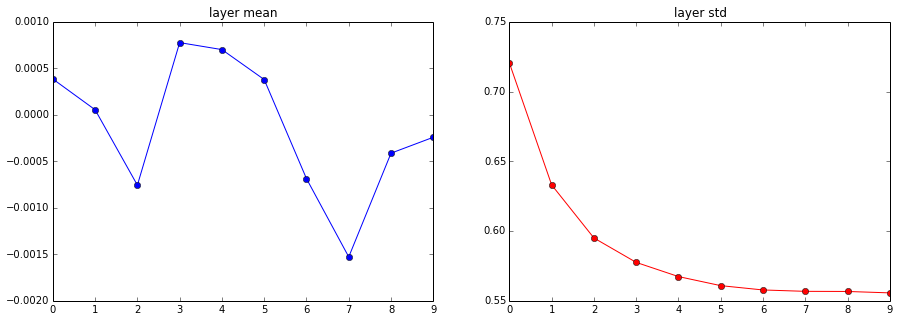

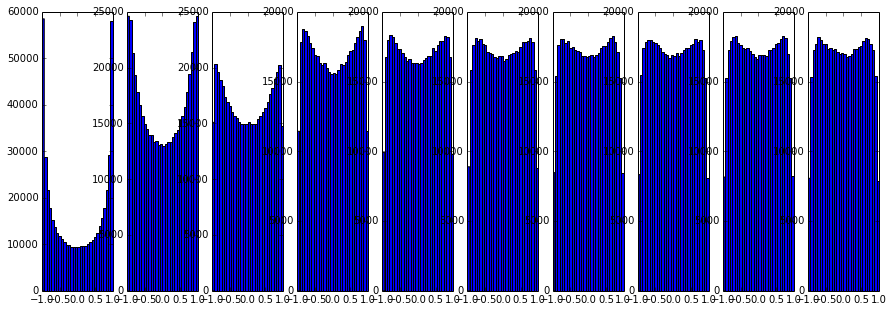

In [34]:
#***************active funtion "tanh"
nonlinearities = ['tanh']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')

input layer had mean -0.000536 and std 1.000232
hidden layer 1 had mean 0.564158 and std 0.824424
hidden layer 2 had mean 0.553223 and std 0.811223
hidden layer 3 had mean 0.548282 and std 0.810047
hidden layer 4 had mean 0.536891 and std 0.801896
hidden layer 5 had mean 0.506204 and std 0.771387
hidden layer 6 had mean 0.512734 and std 0.744881
hidden layer 7 had mean 0.522724 and std 0.760240
hidden layer 8 had mean 0.536649 and std 0.795890
hidden layer 9 had mean 0.591624 and std 0.828165
hidden layer 10 had mean 0.535407 and std 0.823562


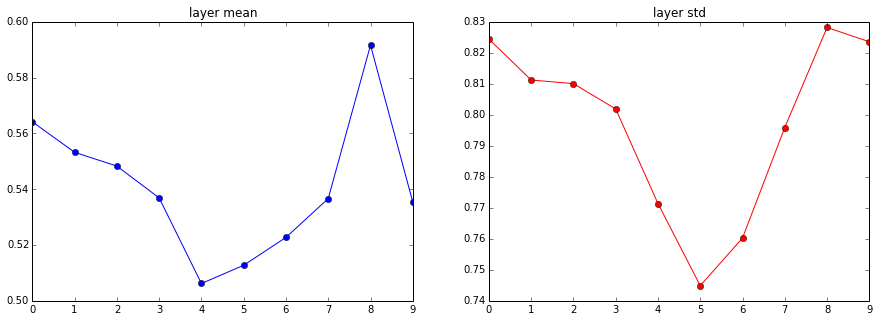

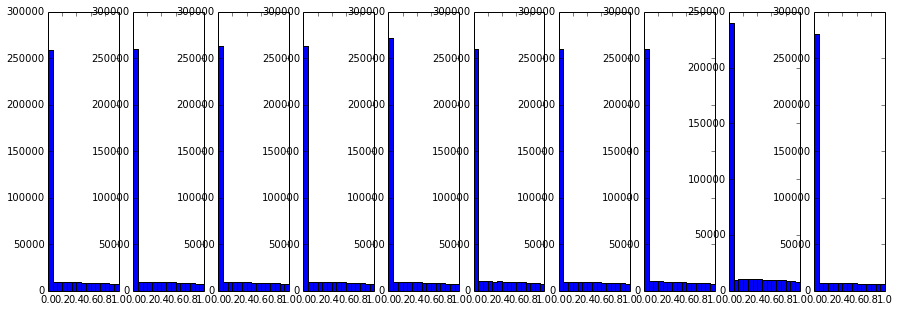

In [35]:
#***************active funtion "tanh"
nonlinearities = ['relu']*len(hidden_layer_sizes)

Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] #input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]

    #-------Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification by He et al., 2015 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

print 'input layer had mean %f and std %f' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
    
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1), histtype='bar')